###Project Summary
<!-- <img src ='https://images.unsplash.com/photo-1556740772-1a741367b93e?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=2700&q=80' width="800" height = "200"> --> 
<!-- Image courtesy of Blake Wisz" -->
######Ivy(Ruxin) Tong | Dec 15th, 2020

####**Objective** : Classify 2627 customers into 4 existing groups (A,B,C,D)






####**Datasets** : Test.csv | Train.csv (from Kaggle) 
######***About the train data***

| Variable   | Definition  | Description |
|-----------------  |---------------|---------------|
| ID    | Unique ID |  |
| Gender  | Gender of the customer | Binary |
| Ever_Married | Marital Status of the customer | Binary |
| Age | Age of the customer | Range from 18 to 89|
| Graduated | Is the customer a graduate | Binary |
| Profession | Profession of the customer |  9 types of Profession|
| Work_Experience | Work experience in years |Range from 0 to 14 years |
| Spending_Score | Spending score of the customer | low, avg, and high|
| Family_Size | Number of family memebers for the customer (including her/himself) | Range from 1 to 9|
| Var_1| Anonymized category for the customer | 7 types|
| Segmentation | Target customer segmentation | 4 Groups : A, B, C, D|

######***Acknowledgement*** : Datasets were downloaded from Kaggle website



####**Conclusion**:




####**Model and Result**:

#### Analysis
  - Load Packages

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
pd.set_option('display.float_format', lambda x : '%0.2f' %x)
%matplotlib inline

- Read Data

In [0]:
train = spark.read.csv("/FileStore/tables/Train.csv", header= True, inferSchema = True).toPandas()
print("train dataset head: ")
train.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,nan,Average,3.00,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,nan,High,6.00,Cat_6,A


In [0]:
test = spark.read.csv("/FileStore/tables/Test.csv", header= True, inferSchema = True).toPandas()
print("test dataset head: ")
test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.00,Low,1.00,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.00,Average,4.00,Cat_6
2,458996,Female,Yes,69,No,None,0.00,Low,1.00,Cat_6
3,459000,Male,Yes,59,No,Executive,11.00,High,2.00,Cat_6
4,459001,Female,No,19,No,Marketing,nan,Low,4.00,Cat_6


- Exploration/Visualization for train dataset

In [0]:
print("Train dataset: ")
print("Number of Rows: " + str(train.shape[0]))
print("Number of Columns: " + str(train.shape[1]))
display(train.info())


Train dataset: 
Number of Rows: 8068
Number of Columns: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 8068 non-null int32 
 1 Gender 8068 non-null object 
 2 Ever_Married 7928 non-null object 
 3 Age 8068 non-null int32 
 4 Graduated 7990 non-null object 
 5 Profession 7944 non-null object 
 6 Work_Experience 7239 non-null float64
 7 Spending_Score 8068 non-null object 
 8 Family_Size 7733 non-null float64
 9 Var_1 7992 non-null object 
 10 Segmentation 8068 non-null object 
dtypes: float64(2), int32(2), object(7)
memory usage: 630.4+ KB

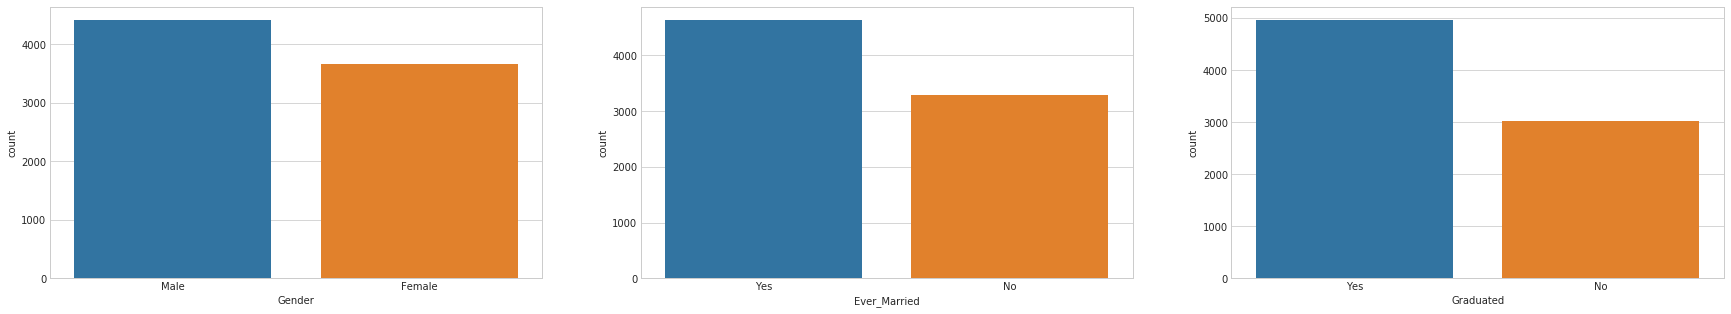

In [0]:
# understand the categorical variables
object_col =train.select_dtypes("object")


# binary
fig, ax = plt.subplots(1,3, figsize=(30,5))
for i, variable in enumerate(["Gender","Ever_Married","Graduated"]):
    sns.countplot(x=variable, data=object_col, order = object_col[variable].value_counts().index, ax = ax[i])


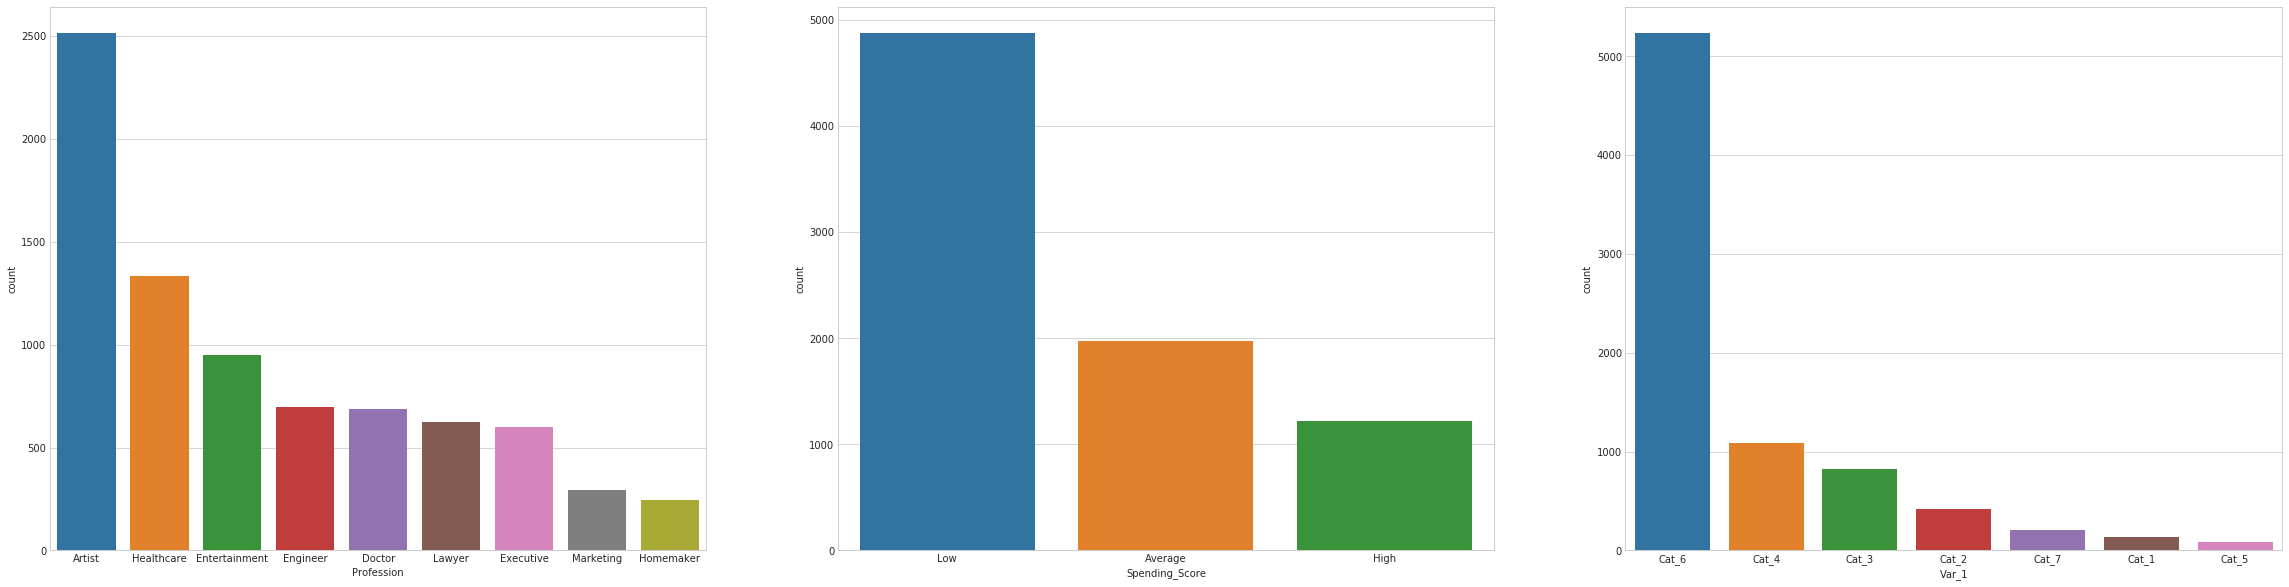

In [0]:
# multiple groups
fig, ax = plt.subplots(1,3, figsize=(40,10))
for i, variable in enumerate(["Profession","Spending_Score","Var_1"]):
    sns.countplot(x=variable, data=object_col, order = object_col[variable].value_counts().index, ax = ax[i])

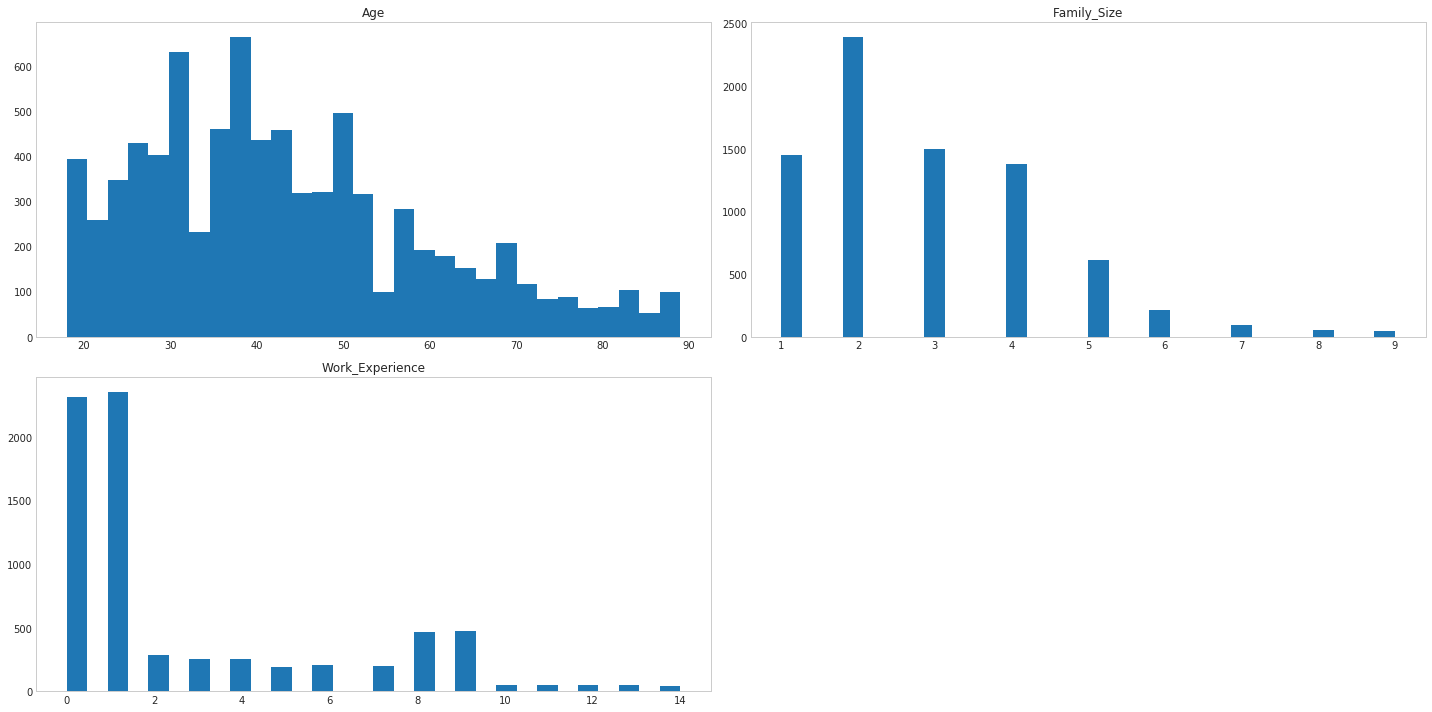

In [0]:
train.select_dtypes(["float64", "int32"]).describe()
train.drop("ID",axis = 1).hist(bins=30,figsize=(20,10),grid=False)
plt.tight_layout()
plt.show()


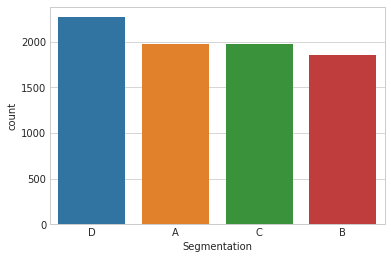

In [0]:
# Result shows it's a balanced

sns.countplot(x="Segmentation", data= train, order = train["Segmentation"].value_counts().index)  



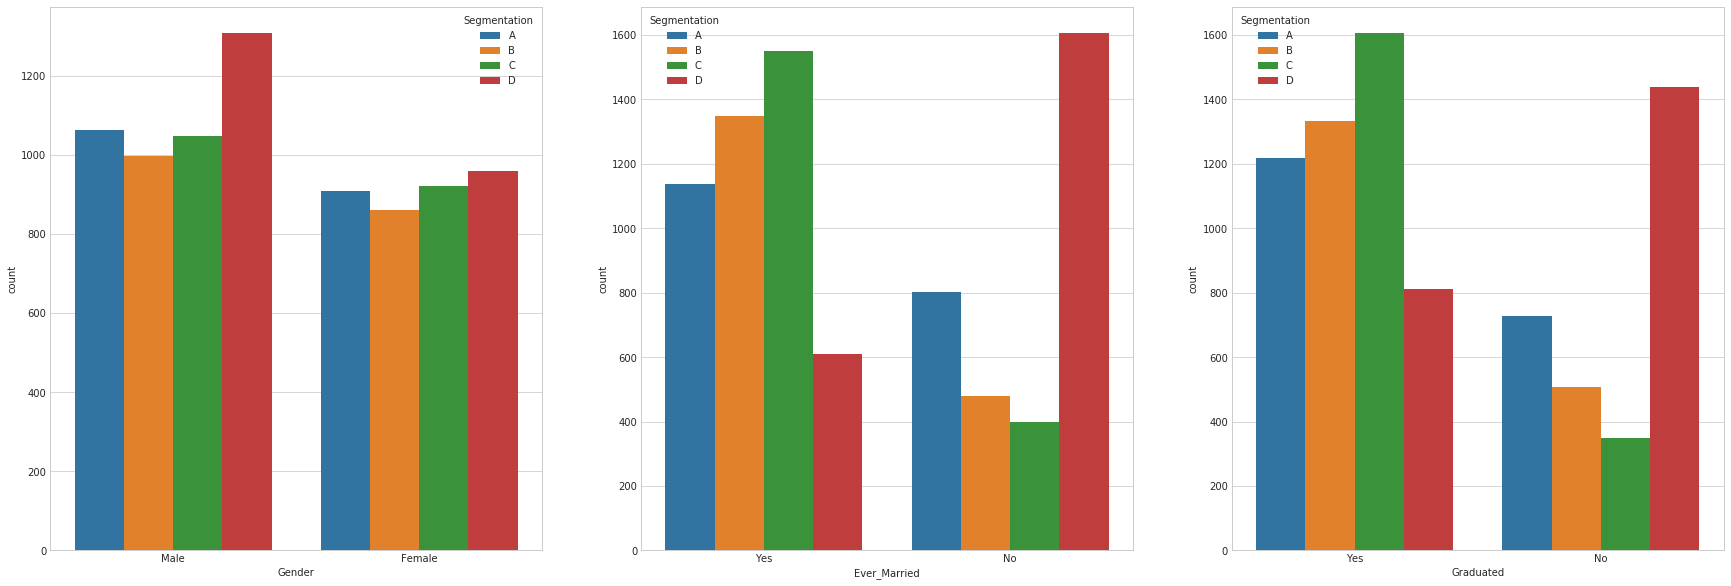

In [0]:
# features and target visualization
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i, variable in enumerate(["Gender","Ever_Married","Graduated"]):
    sns.countplot(x=variable, data=train, hue = "Segmentation",order = object_col[variable].value_counts().index, hue_order = ['A','B','C','D'], ax = ax[i])
    
# It seems that there'is a high percentage of non-married is classified as segmentation D.

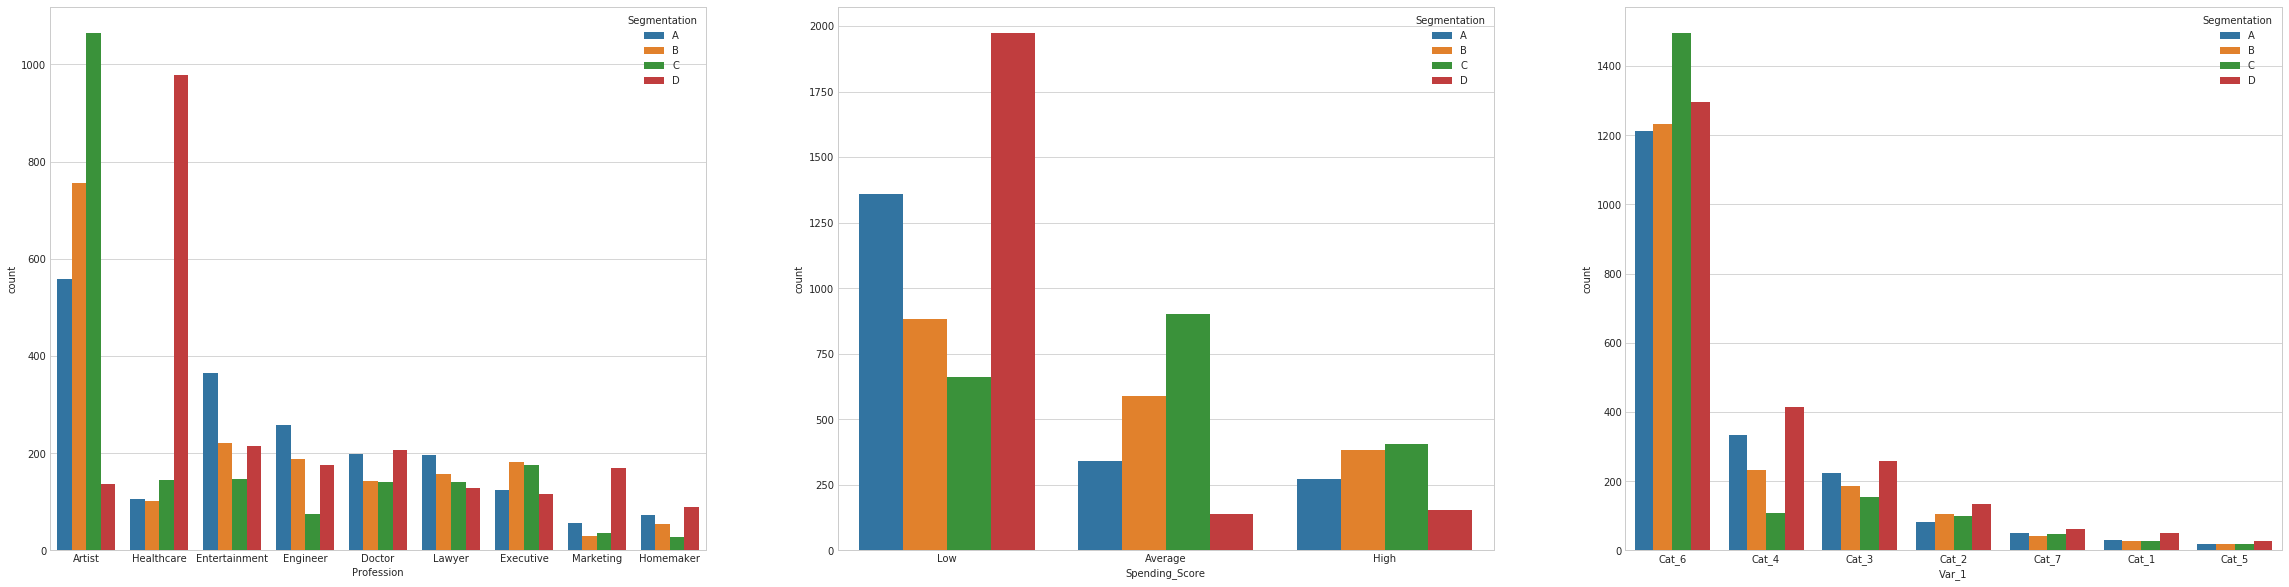

In [0]:
fig, ax = plt.subplots(1,3, figsize=(40,10))
for i, variable in enumerate(["Profession","Spending_Score","Var_1"]):
    sns.countplot(x=variable, data=object_col,  hue = "Segmentation",order = object_col[variable].value_counts().index, hue_order = ['A','B','C','D'], ax = ax[i])

- Visualization for test dataset

In [0]:
print("test dataset: ")
print(test.shape)
display(test.info())

test dataset: 
(2627, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 ID 2627 non-null int32 
 1 Gender 2627 non-null object 
 2 Ever_Married 2577 non-null object 
 3 Age 2627 non-null int32 
 4 Graduated 2603 non-null object 
 5 Profession 2589 non-null object 
 6 Work_Experience 2358 non-null float64
 7 Spending_Score 2627 non-null object 
 8 Family_Size 2514 non-null float64
 9 Var_1 2595 non-null object 
dtypes: float64(2), int32(2), object(6)
memory usage: 184.8+ KB

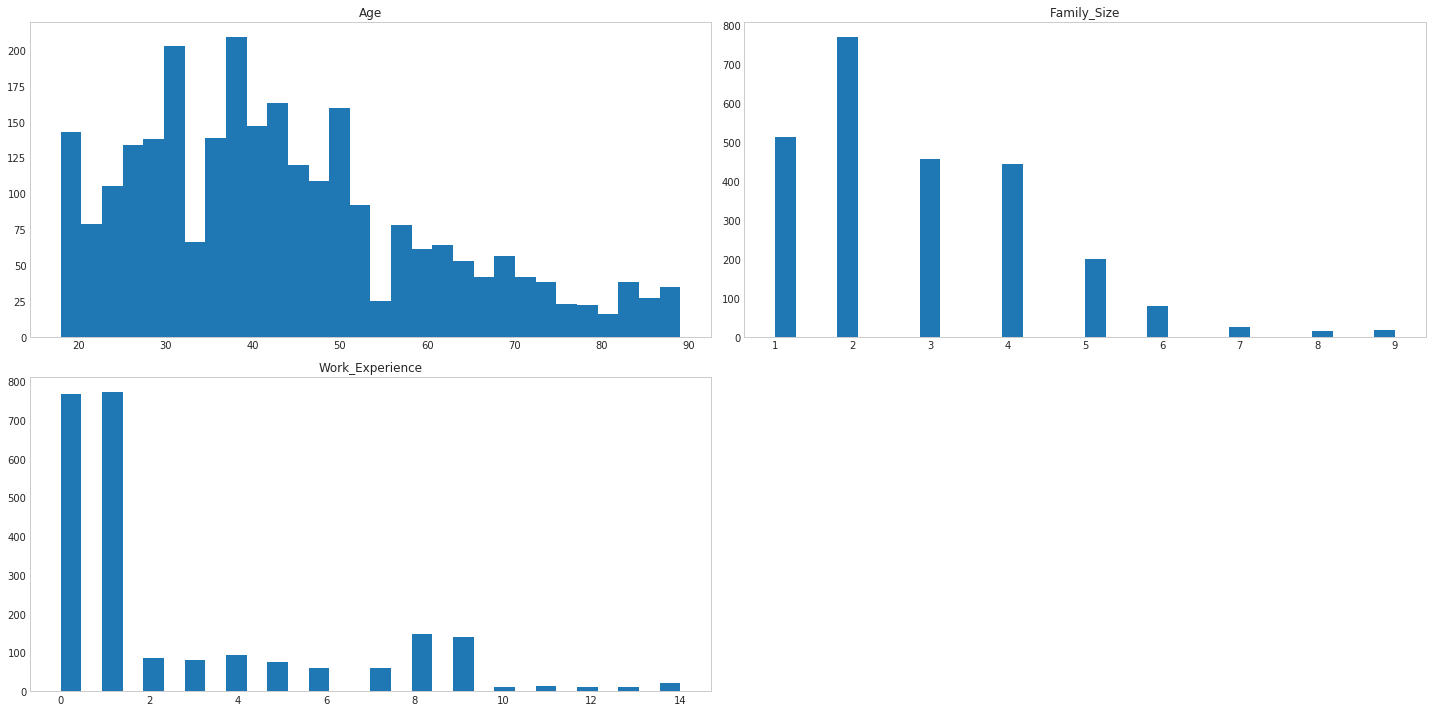

In [0]:
test.drop("ID",axis = 1).hist(bins=30,figsize=(20,10),grid=False)
plt.tight_layout()
plt.show()

In [0]:
# test categorical variable
for i in test.select_dtypes("object").columns:
  print(test.groupby(i).count()[["ID"]]/test[i].count())
  print(" ")

ID
Gender 
Female 0.46
Male 0.54
 
 ID
Ever_Married 
No 0.41
Yes 0.59
 
 ID
Graduated 
No 0.38
Yes 0.62
 
 ID
Profession 
Artist 0.31
Doctor 0.09
Engineer 0.09
Entertainment 0.12
Executive 0.07
Healthcare 0.16
Homemaker 0.03
Lawyer 0.09
Marketing 0.04
 
 ID
Spending_Score 
Average 0.24
High 0.15
Low 0.62
 
 ID
Var_1 
Cat_1 0.01
Cat_2 0.05
Cat_3 0.10
Cat_4 0.15
Cat_5 0.01
Cat_6 0.64
Cat_7 0.03

- Any Duplicate Values?

In [0]:
print('There are', train.duplicated().sum() , "duplicate value(s) on the train dataset")
print('There are', test.duplicated().sum() , "duplicate value(s) on the test dataset")

There are 0 duplicate value(s) on the train dataset
There are 0 duplicate value(s) on the test dataset

- Any Missing Values?

In [0]:
# Missing Values in train dataset
print("Train dataset missing value(s):  ")
print(train.isna().sum().sort_values(ascending = False))  # number

print("Train dataset missing value(s) percentage:  ")
((train.isna().sum()/len(train))*100).sort_values(ascending = False) # percentage



Train dataset missing value(s): 
Work_Experience 829
Family_Size 335
Ever_Married 140
Profession 124
Graduated 78
Var_1 76
Segmentation 0
Spending_Score 0
Age 0
Gender 0
ID 0
dtype: int64
Train dataset missing value(s) percentage: 
Out[56]: Work_Experience 10.28
Family_Size 4.15
Ever_Married 1.74
Profession 1.54
Graduated 0.97
Var_1 0.94
Segmentation 0.00
Spending_Score 0.00
Age 0.00
Gender 0.00
ID 0.00
dtype: float64

In [0]:
# Missing values im test dataset
print("Test dataset missing value:  ")
print(test.isna().sum().sort_values(ascending = False))  # number
print("Test dataset missing value(s) percentage:  ")
((test.isna().sum()/len(test))*100).sort_values(ascending = False) # percentage



Test dataset missing value: 
Work_Experience 269
Family_Size 113
Ever_Married 50
Profession 38
Var_1 32
Graduated 24
Spending_Score 0
Age 0
Gender 0
ID 0
dtype: int64
Test dataset missing value(s) percentage: 
Out[57]: Work_Experience 10.24
Family_Size 4.30
Ever_Married 1.90
Profession 1.45
Var_1 1.22
Graduated 0.91
Spending_Score 0.00
Age 0.00
Gender 0.00
ID 0.00
dtype: float64

- Combine dataset

In [0]:
train['is_train'] = 1
test['is_train'] = 0
combined = pd.concat([train,test])



for i in ["Work_Experience","Family_Size","Ever_Married","Profession","Var_1","Graduated"]:
      combined[i].fillna(train[i].mode()[0], inplace=True)


print("Combined dataset missing value:  ")
print(combined.isna().sum().sort_values(ascending = False))  # number

Combined dataset missing value: 
Segmentation 2627
is_train 0
Var_1 0
Family_Size 0
Spending_Score 0
Work_Experience 0
Profession 0
Graduated 0
Age 0
Ever_Married 0
Gender 0
ID 0
dtype: int64

In [0]:
combined.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,is_train
0,462809,Male,No,22,No,Healthcare,1.00,Low,4.00,Cat_4,D,1
1,462643,Female,Yes,38,Yes,Engineer,1.00,Average,3.00,Cat_4,A,1
2,466315,Female,Yes,67,Yes,Engineer,1.00,Low,1.00,Cat_6,B,1
3,461735,Male,Yes,67,Yes,Lawyer,0.00,High,2.00,Cat_6,B,1
4,462669,Female,Yes,40,Yes,Entertainment,1.00,High,6.00,Cat_6,A,1


- Feature Engineering

In [0]:
# coding the categorical variables
from sklearn.preprocessing import LabelEncoder

for i in combined.drop('Segmentation',axis=1).select_dtypes("object").columns:
  labelencoder = LabelEncoder()
  combined[i] = labelencoder.fit_transform(combined[i]).astype('str')

segmentation = {"Segmentation": {"A": 0, "B": 1, "C":2, "D" : 3}}

combined = combined.replace(segmentation)
combined.head()


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,is_train
0,462809,1,0,22,0,5,1.00,2,4.00,3,3.00,1
1,462643,0,1,38,1,2,1.00,0,3.00,3,0.00,1
2,466315,0,1,67,1,2,1.00,2,1.00,5,1.00,1
3,461735,1,1,67,1,7,0.00,1,2.00,5,1.00,1
4,462669,0,1,40,1,3,1.00,1,6.00,5,0.00,1


In [0]:
# train
train = combined[combined["is_train"]==1]
test = combined[combined["is_train"]==0]